In [1]:

import os
while not os.path.exists('ddos_learner'):
    os.chdir('../..')

In [2]:
import ddos_learner
import ddos_learner.common
import ddos_learner.ton.dataset

In [3]:
train_ds = ddos_learner.ton.dataset.TONIoTDataset()
test_ds = ddos_learner.ton.dataset.TONIoTDataset(False)

In [4]:
from river.tree import HoeffdingTreeClassifier
from river.ensemble import SRPClassifier

In [5]:
model = SRPClassifier(HoeffdingTreeClassifier())

Training initiated... 
At 50000.
Acc: 0.92320693. Prec: 0.93780556.
Recl: 0.98180762. F1: 0.95930228
At 100000.
Acc: 0.63028899. Prec: 0.97611480.
Recl: 0.61396159. F1: 0.75379648
At 150000.
Acc: 0.92072924. Prec: 0.92251409.
Recl: 0.99781824. F1: 0.95868967
At 200000.
Acc: 0.88293683. Prec: 0.94788182.
Recl: 0.92380439. F1: 0.93568824
At 250000.
Acc: 0.92678581. Prec: 0.92649987.
Recl: 0.99990045. F1: 0.96180179
At 300000.
Acc: 0.92889643. Prec: 0.92878011.
Recl: 0.99951056. F1: 0.96284812
At 350000.
Acc: 0.93181001. Prec: 0.93224447.
Recl: 0.99860633. F1: 0.96428500
Resetting dataset.
At 400000.
Acc: 0.92911820. Prec: 0.92865728.
Recl: 0.99992534. F1: 0.96297450
At 450000.
Acc: 0.66137481. Prec: 0.97106785.
Recl: 0.65208843. F1: 0.78023554
At 500000.
Acc: 0.52740370. Prec: 0.96391061.
Recl: 0.50628396. F1: 0.66387469
At 550000.
Acc: 0.90933492. Prec: 0.92618792.
Recl: 0.97972541. F1: 0.95220473
At 600000.
Acc: 0.92381105. Prec: 0.93688960.
Recl: 0.98360778. F1: 0.95968045
At 650000.


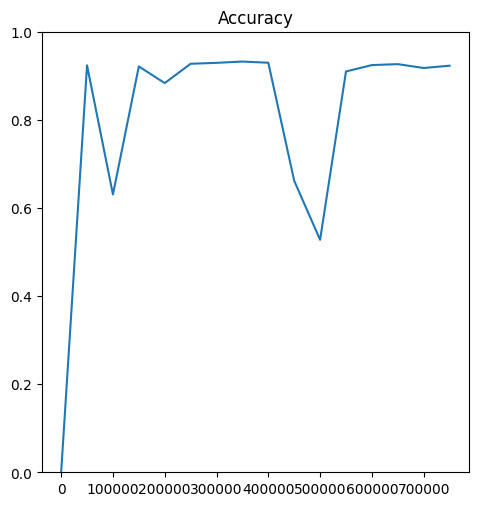

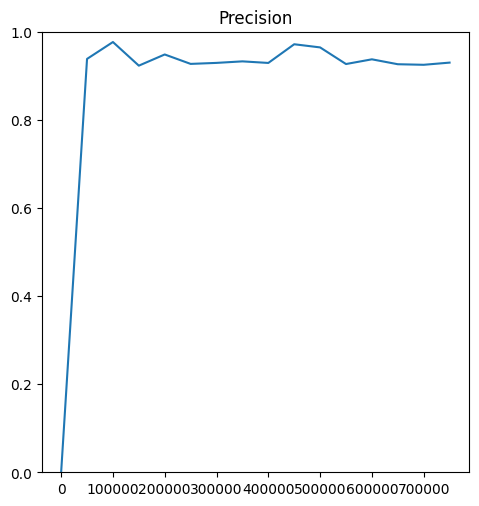

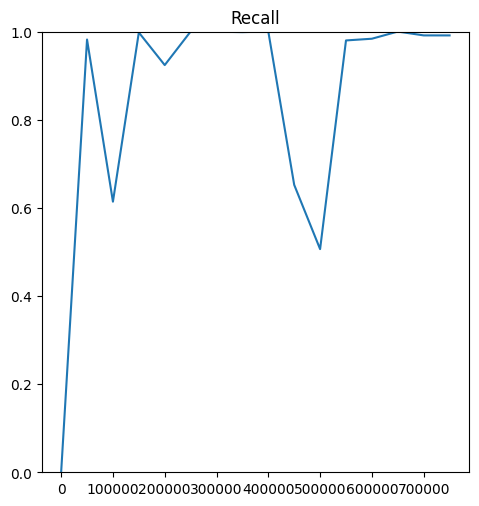

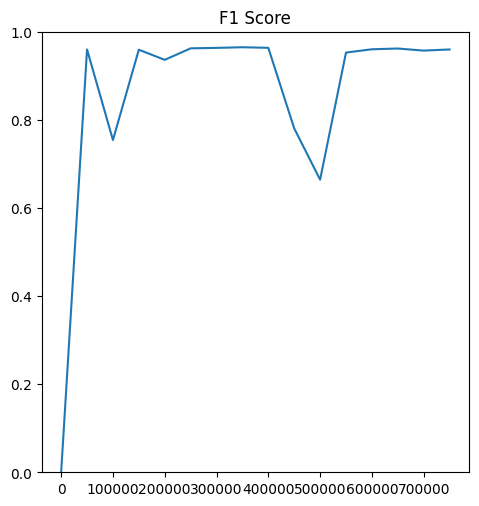

In [6]:
ddos_learner.common.train(model, train_ds, test_ds, 800000, step_size=50000, subpath='srp_htd_ton')

In [7]:
test_ds.reset()
ddos_learner.common.test(test_ds, -1, 'srp_htd_ton')

At 100
At 200
At 300
At 400
At 500
At 600
At 700
At 800
At 900
At 1000
At 1100
At 1200
At 1300
At 1400
At 1500
At 1600
At 1700
At 1800
At 1900
At 2000
At 2100
At 2200
At 2300
At 2400
At 2500
At 2600
At 2700
At 2800
At 2900
At 3000
At 3100
At 3200
At 3300
At 3400
At 3500
At 3600
At 3700
At 3800
At 3900
At 4000
At 4100
At 4200
At 4300
At 4400
At 4500
At 4600
At 4700
At 4800
At 4900
At 5000
At 5100
At 5200
At 5300
At 5400
At 5500
At 5600
At 5700
At 5800
At 5900
At 6000
At 6100
At 6200
At 6300
At 6400
At 6500
At 6600
At 6700
At 6800
At 6900
At 7000
At 7100
At 7200
At 7300
At 7400
At 7500
At 7600
At 7700
At 7800
At 7900
At 8000
At 8100
At 8200
At 8300
At 8400
At 8500
At 8600
At 8700
At 8800
At 8900
At 9000
At 9100
At 9200
At 9300
At 9400
At 9500
At 9600
At 9700
At 9800
At 9900
At 10000
At 10100
At 10200
At 10300
At 10400
At 10500
At 10600
At 10700
At 10800
At 10900
At 11000
At 11100
At 11200
At 11300
At 11400
At 11500
At 11600
At 11700
At 11800
At 11900
At 12000
At 12100
At 12200
At 12300
A

(Accuracy: 93.05%, Precision: 92.99%, Recall: 99.99%, F1: 96.37%)

In [ ]:
model = HoeffdingTreeClassifier()
train_ds = ddos_learner.ton.dataset.TONIoTDataset()
test_ds = ddos_learner.ton.dataset.TONIoTDataset(False)

Training initiated. 
At 5000.
Acc: 0.75833792. Prec: 0.75833792.
Recl: 1.00000000. F1: 0.86256221
At 10000.
Acc: 0.81799090. Prec: 0.81799090.
Recl: 1.00000000. F1: 0.89988448
At 15000.
Acc: 0.96829841. Prec: 0.96829841.
Recl: 1.00000000. F1: 0.98389391
At 20000.
Acc: 0.98164908. Prec: 0.98164908.
Recl: 1.00000000. F1: 0.99073957
At 25000.
Acc: 0.99309965. Prec: 0.99309965.
Recl: 1.00000000. F1: 0.99653788
At 30000.
Acc: 0.98049902. Prec: 0.98049902.
Recl: 1.00000000. F1: 0.99015350
At 35000.
Test dataset reached end. Resetting.
Acc: 0.89654483. Prec: 0.99258029.
Recl: 0.90257288. F1: 0.94543920
At 40000.
Acc: 0.81134057. Prec: 0.84263677.
Recl: 0.85521750. F1: 0.84888052
At 45000.
Acc: 0.91664583. Prec: 0.97183794.
Recl: 0.93880257. F1: 0.95503466
At 50000.
Acc: 0.99304965. Prec: 0.99896217.
Recl: 0.99385648. F1: 0.99640278
At 55000.
Acc: 0.98459923. Prec: 0.99423515.
Recl: 0.99022916. F1: 0.99222811
At 60000.
Acc: 0.97754888. Prec: 0.98861499.
Recl: 0.98856475. F1: 0.98858987
At 6500

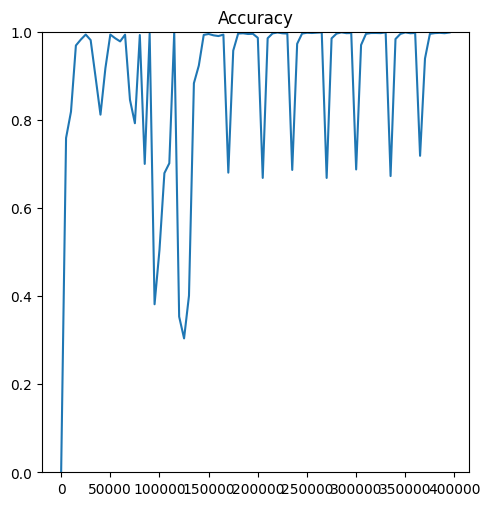

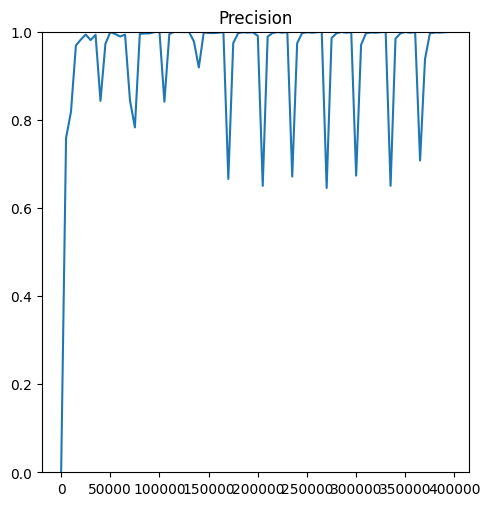

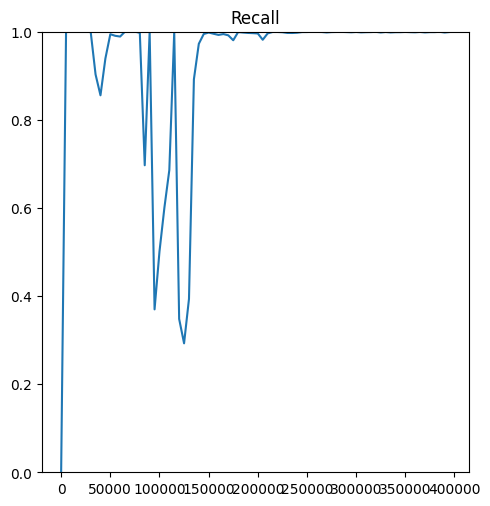

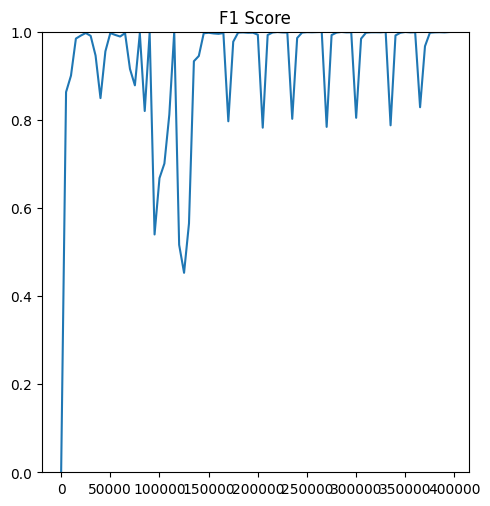

In [ ]:
ddos_learner.common.train(model, train_ds, test_ds, 400000, step_size=5000, subpath='htd_ton')


In [ ]:
test_ds.reset()
ddos_learner.common.test(test_ds, -1, 'htd_ton')